### **Problem Statement**

##### - Predicting each score (Regression)



**Import Libraries**

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# # mac
# data = pd.read_csv('/Users/azel/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

#windows
data = pd.read_csv('C:/Users/azelt/OneDrive/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

### **Classification**

Classification Report:
              precision    recall  f1-score   support

        high       0.20      0.03      0.06        29
         low       0.48      0.34      0.40        62
      medium       0.56      0.78      0.65       109

    accuracy                           0.54       200
   macro avg       0.41      0.38      0.37       200
weighted avg       0.48      0.54      0.49       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


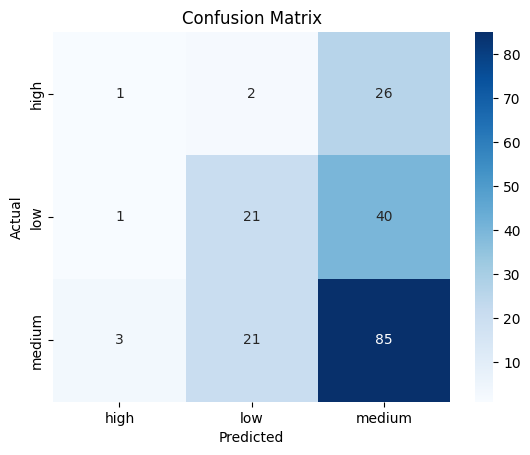

In [6]:
# Step 1: Define categories for average score
def categorize_performance(score):
    if score < 60:
        return 'low'
    elif 60 <= score <= 80:
        return 'medium'
    else:
        return 'high'

data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['performance_category'] = data['average score'].apply(categorize_performance)

# Step 2: Encode the target variable (low, medium, high)
label_encoder = LabelEncoder()
data['performance_label'] = label_encoder.fit_transform(data['performance_category'])

# Step 3: Define features and target
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average score', 
                       'performance_category', 'performance_label'])
y = data['performance_label']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

==================================================================================================================================================

In [14]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Ensure data is numeric
X_train = X_train.astype(float)  # Convert features to float
y_train = y_train.astype(int)    # Ensure target is integer

# Convert to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Debugging: Inspect shapes and types
print("X_train_np shape:", X_train_np.shape)
print("y_train_np shape:", y_train_np.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_np, y_train_np)
print("SMOTE applied successfully!")


X_train_np shape: (800, 12)
y_train_np shape: (800,)
SMOTE applied successfully!


In [15]:
# Train Logistic Regression on oversampled data
oversampled_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
oversampled_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_oversampled = oversampled_model.predict(X_test)
oversampled_report = classification_report(y_test, y_pred_oversampled, target_names=label_encoder.classes_)

# Print the classification report
print("Classification Report for Oversampled Data:")
print(oversampled_report)


Classification Report for Oversampled Data:
              precision    recall  f1-score   support

        high       0.30      0.83      0.44        29
         low       0.51      0.68      0.58        62
      medium       0.64      0.23      0.34       109

    accuracy                           0.46       200
   macro avg       0.49      0.58      0.46       200
weighted avg       0.55      0.46      0.43       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
